# 서울의 기온 데이터 분석

* https://data.kma.go.kr/stcs/grnd/grndTaList.do?pgmNo=70

* 기온분석>
    * 자료구분:일,
    * 자료형태:기본,
    * 기간: ~ 현재, 
    * 지역: 서울
* CSV 파일 형태로 다운

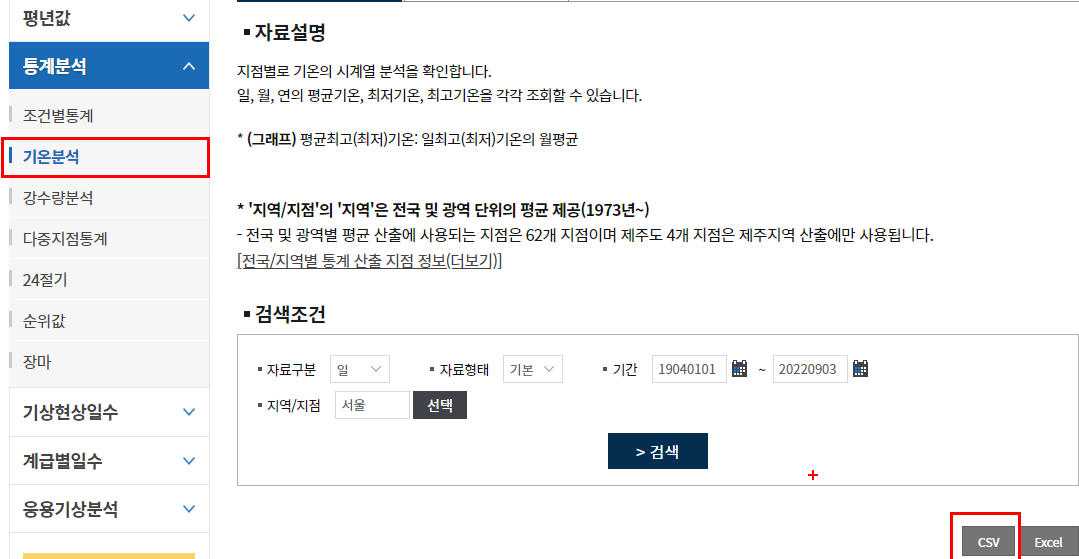

### 데이터에 대한 질문

* 서울이 가장 더웠던 날은 언제였을까? 얼마나 더웠을까?
* 일교차가 가장 큰 시기는 1년 중 언제쯤일까?
* 겨울에는 언제 가장 추울까? 12월? 1월? 2월?
* 가장 덥다고 알려진 대구보다 서울이 더 더운 날이 1년 중 얼마나 있을까?

## 라이브러리 로드

In [1]:
!pip install matplotlib

In [1]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# #코랩의 경우
# # 나눔고딕 폰트 인스톨
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

## 데이터 로드

In [20]:
# 데이터 로드, 인코딩, header,sep 등 필요한 파라미터 사용
df=pd.read_csv('./data/ta_20220920102220.csv',encoding='euc-kr')
df.head()
#header 지정 안해줬을때 나오는 형식임 /지우기 전/

,기온분석,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,[검색조건],NaN,NaN,NaN,NaN
1,자료구분 : 일,NaN,NaN,NaN,NaN
2,자료형태 : 기본,NaN,NaN,NaN,NaN
3,지역/지점 : 서울,NaN,NaN,NaN,NaN
4,기간 : 19040101~20220919,NaN,NaN,NaN,NaN


## 데이터 살펴보기

In [54]:
df=pd.read_csv('./data/ta_20220920102220_UTF-8.csv') # 디폴트가 utf8 다른걸로 바꾸면 유니코드 에러
# header =x 이거는 x 줄 부터 불러 들이겠다는 뜻인데 그냥 위에 안쓰는 데이터를 지우고 사용해도 무방하다 /지우고난 후/ 
# 한글에서 많이쓰는 인코딩 utf-8 euc-kr cp949 utf-8-sig 이렇게 4개 많이쓰는데 대부분 utf-8
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


## 데이터 살펴보기

* 데이터 사이즈 (행수, 컬럼수)
* 컬럼이름과 타임
* 결측치 유무 
* 통계정보

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41562 entries, 0 to 41561
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       41562 non-null  object 
 1   지점       41562 non-null  int64  
 2   평균기온(℃)  40806 non-null  float64
 3   최저기온(℃)  40803 non-null  float64
 4   최고기온(℃)  40803 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


> * 데이터수: 41562건
> * 컬럼수와 이름: 5개
> * 컬럼 타임 : 날짜->str, 지점(도메인)-정수, 기온-실수,
> * 결측치 유무: 기온관련 컬럼에 대해서는 결측치 존재 -> 안에 뭘넣을지 의논

In [9]:
df.shape

(41562, 5)

In [10]:
df.describe() #통계정보는 숫자형 컬럼에만 국한된다.
# 지점의 경우 모든값이 같으므로 서울에서만 측정한것으로 보인다.

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
count,41562.0,40806.000000,40803.000000,40803.000000
mean,108.0,11.781135,7.490523,16.784746
std,0.0,10.662868,10.891121,10.980128
min,108.0,-19.200000,-23.100000,-16.300000
25%,108.0,2.725000,-1.400000,7.300000
50%,108.0,13.000000,8.000000,18.600000
75%,108.0,21.200000,17.200000,26.300000
max,108.0,33.700000,30.300000,39.600000


In [11]:
df.count()

날짜         41562
지점         41562
평균기온(℃)    40806
최저기온(℃)    40803
최고기온(℃)    40803
dtype: int64

In [12]:
df.isnull().sum()

날짜           0
지점           0
평균기온(℃)    756
최저기온(℃)    759
최고기온(℃)    759
dtype: int64

## 결측 데이터 전처리

### 결측데이터수 파악하기

In [22]:
df.isnull().sum()

날짜           0
지점           0
평균기온(℃)    756
최저기온(℃)    759
최고기온(℃)    759
dtype: int64

### 평균기온, 최저기온, 최고 기온 결측치인 날짜 찾음

In [31]:
# 평균기온, 최저기온, 최고 기온의 결측치인 날짜 찾음
avg_temp=df[df['평균기온(℃)'].isnull()] 
avg_temp

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15676,1950-09-01,108,NaN,NaN,NaN
15677,1950-09-02,108,NaN,NaN,NaN
15678,1950-09-03,108,NaN,NaN,NaN
15679,1950-09-04,108,NaN,NaN,NaN
15680,1950-09-05,108,NaN,NaN,NaN
...,...,...,...,...,...
16427,1953-11-26,108,NaN,NaN,NaN
16428,1953-11-27,108,NaN,NaN,NaN
16429,1953-11-28,108,NaN,NaN,NaN
16430,1953-11-29,108,NaN,NaN,NaN


> *평균기온의 경우 1950-09-01~1953-11-30 까지 없다 전쟁중이라 결측치 존재 1950.6.25~ 1953-07-27

In [32]:
min_temp=df[df['최저기온(℃)'].isnull()]
min_temp

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15676,1950-09-01,108,NaN,NaN,NaN
15677,1950-09-02,108,NaN,NaN,NaN
15678,1950-09-03,108,NaN,NaN,NaN
15679,1950-09-04,108,NaN,NaN,NaN
15680,1950-09-05,108,NaN,NaN,NaN
...,...,...,...,...,...
16430,1953-11-29,108,NaN,NaN,NaN
16431,1953-11-30,108,NaN,NaN,NaN
21260,1967-02-19,108,-1.7,NaN,NaN
23691,1973-10-16,108,12.3,NaN,NaN


> * 1950-09-01~1953-11-30 랑 1967-02-19,1973-10-16,2022-08-08 결측치 존재

In [33]:
max_temp=df[df['최고기온(℃)'].isnull()]
max_temp


,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15676,1950-09-01,108,NaN,NaN,NaN
15677,1950-09-02,108,NaN,NaN,NaN
15678,1950-09-03,108,NaN,NaN,NaN
15679,1950-09-04,108,NaN,NaN,NaN
15680,1950-09-05,108,NaN,NaN,NaN
...,...,...,...,...,...
16430,1953-11-29,108,NaN,NaN,NaN
16431,1953-11-30,108,NaN,NaN,NaN
21260,1967-02-19,108,-1.7,NaN,NaN
23691,1973-10-16,108,12.3,NaN,NaN


> * 평균온도의 결측지와 1967-02-19,1973-10-16,2017-10-12에 결측치 존재

In [ ]:
# 2017년에도 결측치 있네...
# 최고온도에서 2019-10-12에 결측치가 존재한다.

### 결측치 데이터 처리


In [55]:
# 평균기온은 0, 최저기온은 999, 최고기온은 -999로 채움
df['평균기온(℃)']=df['평균기온(℃)'].fillna(0)
df['최저기온(℃)']=df['최저기온(℃)'].fillna(999)
df['최고기온(℃)']=df['최고기온(℃)'].fillna(-999)

In [56]:
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [57]:
#결측치였던 1950년대 데이터가 어떻게 바뀌었는지 확인
df[(df['날짜']>='1950-09-01') & (df['날짜']<='1953-11-30')]
# df[df['날짜'].str.contains('1950')] 특정 스트링타입이 있는지 판단
# df[(df['최저기온(℃)']==-999)| (df['최고기온(℃)']==999) | (df['평균기온(℃)']==0)] 바꾼것만 보고싶다

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15676,1950-09-01,108,0.0,999.0,-999.0
15677,1950-09-02,108,0.0,999.0,-999.0
15678,1950-09-03,108,0.0,999.0,-999.0
15679,1950-09-04,108,0.0,999.0,-999.0
15680,1950-09-05,108,0.0,999.0,-999.0
...,...,...,...,...,...
16427,1953-11-26,108,0.0,999.0,-999.0
16428,1953-11-27,108,0.0,999.0,-999.0
16429,1953-11-28,108,0.0,999.0,-999.0
16430,1953-11-29,108,0.0,999.0,-999.0


## 컬럼명 바꾸기

In [58]:
df.columns

Index(['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'], dtype='object')

In [59]:
df.rename(columns={df.columns[2]: '평균기온',
                   df.columns[3]: '최저기온',
                   df.columns[4]: '최고기온'}, inplace=True)

In [60]:
df.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


## 서울에서 가장 더웠던 날은?

In [61]:
df.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [62]:
#최고 더운 날은?
df.sort_values(by=['최고기온'],ascending=False)

,날짜,지점,평균기온,최저기온,최고기온
40051,2018-08-01,108,33.6,27.8,39.6
31277,1994-07-24,108,33.1,28.1,38.4
40050,2018-07-31,108,32.6,27.8,38.3
13111,1943-08-24,108,29.0,23.2,38.2
31276,1994-07-23,108,32.6,28.0,38.2
...,...,...,...,...,...
16069,1952-12-03,108,0.0,999.0,-999.0
15869,1952-04-16,108,0.0,999.0,-999.0
15909,1952-05-26,108,0.0,999.0,-999.0
16070,1952-12-04,108,0.0,999.0,-999.0


In [75]:
# 서울에서 가장 더웠던 날은? 2018-08-01: 39.6도 출력
# df.sort_values(by=['최고기온'],ascending=False).iloc[:1,[0,4]]
df.sort_values(by=['최고기온'],ascending=False).loc[40051,['날짜','최고기온']]



날짜      2018-08-01
최고기온          39.6
Name: 40051, dtype: object

In [78]:
# 서울에서 가장 더웠던 날은? 2018-08-01: 39.6도 출력

max_temp=max(df['최고기온'])
day=df.loc[40051,'날짜']
print(f'서울에서 가장 더웠던 날은? {day} {max_temp}도')

서울에서 가장 더웠던 날은? 2018-08-01 39.6도


In [77]:
df.loc[40051,'날짜']

'2018-08-01'

# 내 생일날 기온변화 그래프 그리기

## 내 생일날 기온변화 그래프 그리기(평균기온 기준)
* 데이터 로딩
* 결측 데이터 전처리
* 내 생일 데이터만 추출
* 필요한 컬럼만 추출 or 불필요한 데이터 삭제
* 그래프 그리기

In [84]:
#라이브러리 임포트
import pandas as pd
# 데이터 로딩
temp_df=pd.read_csv('./data/ta_20220920102220_UTF-8.csv')
# 결측치 처리
temp_df['평균기온(℃)'].fillna(0, inplace=True)
temp_df['최저기온(℃)'].fillna(999, inplace=True)
temp_df['최고기온(℃)'].fillna(-999, inplace=True)

temp_df.rename(columns={
    temp_df.columns[2]:'평균기온',
    temp_df.columns[3]:'최저기온',
    temp_df.columns[4]:'최고기온'
} , inplace=True)


In [85]:
temp_df.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [90]:
birth_temp=temp_df[temp_df['날짜'].str.contains('05-15')]
birth_temp

,날짜,지점,평균기온,최저기온,최고기온
227,1908-05-15,108,14.8,5.5,24.0
592,1909-05-15,108,14.1,8.4,21.1
957,1910-05-15,108,17.7,11.6,26.2
1322,1911-05-15,108,13.5,7.4,21.0
1688,1912-05-15,108,17.7,9.5,25.5
...,...,...,...,...,...
39973,2018-05-15,108,23.2,15.4,29.3
40338,2019-05-15,108,20.7,14.8,28.0
40704,2020-05-15,108,16.1,14.1,20.2
41069,2021-05-15,108,22.1,20.8,26.2


In [92]:
birth_df=birth_temp[['날짜','평균기온']]

In [93]:
birth_df.head()

,날짜,평균기온
227,1908-05-15,14.8
592,1909-05-15,14.1
957,1910-05-15,17.7
1322,1911-05-15,13.5
1688,1912-05-15,17.7


## 내 생일 데이터만 추출

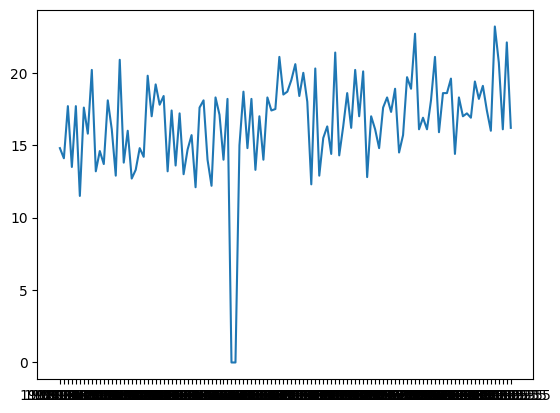

In [94]:
# 어떤 컬럼을 기준으로 내생일 기온그래프를 그릴껀지 고민
# 내 생일 데이터만 추출
import matplotlib.pyplot as plt
plt.plot(birth_df['날짜'],birth_df['평균기온'])



> * 결측치에서 평균기온을 0도를 넣어서 0도로 뚝떨어진다.

In [95]:
birth_df['평균기온'] <5

227      False
592      False
957      False
1322     False
1688     False
         ...  
39973    False
40338    False
40704    False
41069    False
41434    False
Name: 평균기온, Length: 114, dtype: bool

In [97]:
birth_df[birth_df['평균기온']<5]

,날짜,평균기온
15898,1952-05-15,0.0
16232,1953-05-15,0.0


> * 결측치 처리를 잘못한 것이 문제로 보인다. 전처리 실패
> * 결측치 삭제

In [99]:
#라이브러리 임포트
import pandas as pd
# 데이터 로딩
temp_df=pd.read_csv('./data/ta_20220920102220_UTF-8.csv')

temp_df.rename(columns={
    temp_df.columns[2]:'평균기온',
    temp_df.columns[3]:'최저기온',
    temp_df.columns[4]:'최고기온'
} , inplace=True)


In [100]:
# 결측치 삭제
temp_df.dropna(inplace=True)

In [101]:
temp_df.isnull().sum()

날짜      0
지점      0
평균기온    0
최저기온    0
최고기온    0
dtype: int64

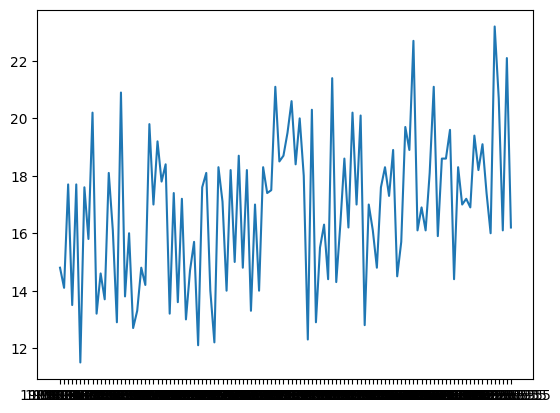

In [102]:
birth_temp=temp_df[temp_df['날짜'].str.contains('05-15')]
birth_df=birth_temp[['날짜','평균기온']]
plt.plot(birth_df['날짜'],birth_df['평균기온'])


## 필요한 컬럼만 추출

In [ ]:
# 필요한 컬럼만 추출




In [ ]:
# 내 생일 데이터 그래프 그리기




## 결측 데이터 재 처리

> * 평균 기온이 0인 데이터 어떻게 처리 할 것인가?
> * 결측치를 삭제하는 것으로 처리

In [38]:
#라이브러리 임포트
# 데이터 로딩
# 결측치 처리


In [39]:
# 결측 데이터 삭제


## 내가 태어난 이 후의 데이터만 추출해서 살펴보기

In [128]:
# 내 생일이면서, 1980년 이후의 데이터만 추출

after_1980s=temp_df[(temp_df['날짜']>='1980-01-01')&(temp_df['날짜'].str.contains('05-15'))]
#뭔순차적으로 할라고 하니까 인덱스 에러나가나서 실패함
# 그래서 생각하는것 자체를 약간 이프문 하듯이 해야할거같다.
after_1980s.head()


,날짜,지점,평균기온,최저기온,최고기온
26094,1980-05-15,108,16.3,12.0,22.2
26459,1981-05-15,108,18.6,14.9,22.0
26824,1982-05-15,108,16.2,10.6,21.4
27189,1983-05-15,108,20.2,16.2,24.1
27555,1984-05-15,108,17.0,12.0,22.5


In [130]:
# 필요한 컬럼만 추출
after_1980s[['날짜', '평균기온']].head()

,날짜,평균기온
26094,1980-05-15,16.3
26459,1981-05-15,18.6
26824,1982-05-15,16.2
27189,1983-05-15,20.2
27555,1984-05-15,17.0


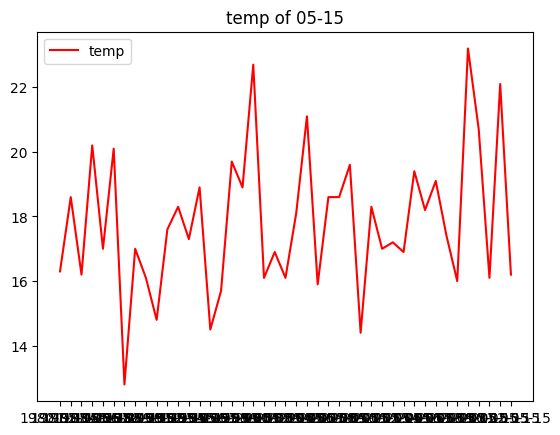

In [134]:
# 내 생일 데이터 그래프 그리기
import matplotlib.pyplot as plt
plt.title('temp of 05-15')
plt.plot(after_1980s['날짜'],after_1980s['평균기온'],color='red', label='temp')
plt.legend()
plt.show()

## 내가 태어난 날 -> 날짜 형식으로 변환하고 데이터 추출하고 보기

### 날짜 컬럼 Dtype 확인

In [135]:
# 날짜 컬럼 타입 확인
temp_df['날짜']=temp_df['날짜'].astype('datetime64')
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40802 entries, 0 to 41561
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      40802 non-null  datetime64[ns]
 1   지점      40802 non-null  int64         
 2   평균기온    40802 non-null  float64       
 3   최저기온    40802 non-null  float64       
 4   최고기온    40802 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 1.9 MB


In [136]:
temp_df.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [137]:
temp_df['날짜'].dt.year

0        1907
1        1907
2        1907
3        1907
4        1907
         ... 
41557    2022
41558    2022
41559    2022
41560    2022
41561    2022
Name: 날짜, Length: 40802, dtype: int64

In [138]:
temp_df['날짜'].dt.month

0        10
1        10
2        10
3        10
4        10
         ..
41557     9
41558     9
41559     9
41560     9
41561     9
Name: 날짜, Length: 40802, dtype: int64

In [139]:
temp_df['날짜'].dt.day
### object -> datetime64[ns] 형변환

0         1
1         2
2         3
3         4
4         5
         ..
41557    15
41558    16
41559    17
41560    18
41561    19
Name: 날짜, Length: 40802, dtype: int64

In [141]:
# 날짜 데이터 Str => date 형으로 변환
temp_df['년']=temp_df['날짜'].dt.year
temp_df['월']=temp_df['날짜'].dt.month
temp_df['일']=temp_df['날짜'].dt.day

In [142]:
temp_df.head()

,날짜,지점,평균기온,최저기온,최고기온,년,월,일
0,1907-10-01,108,13.5,7.9,20.7,1907,10,1
1,1907-10-02,108,16.2,7.9,22.0,1907,10,2
2,1907-10-03,108,16.2,13.1,21.3,1907,10,3
3,1907-10-04,108,16.5,11.2,22.0,1907,10,4
4,1907-10-05,108,17.6,10.9,25.4,1907,10,5


### 내 생일이면서 1980년 이후의 데이터만 추출

In [148]:
# 내 생일이면서, 1980년 이후의 데이터만 추출
after=temp_df[(temp_df['년']>=1980)&(temp_df['월']==5)&(temp_df['일']==15)]

In [154]:
# 필요한 컬럼만 추출
after[['년','평균기온']].head()


,년,평균기온
26094,1980,16.3
26459,1981,18.6
26824,1982,16.2
27189,1983,20.2
27555,1984,17.0


## 그래프 그리기

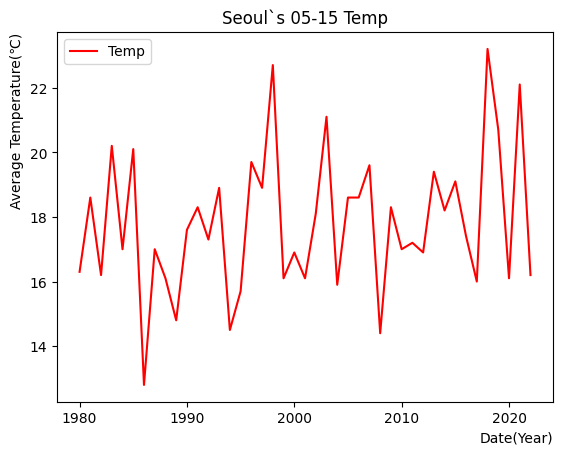

In [156]:
# 내 생일 데이터 그래프 그리기
import matplotlib.pyplot as plt
plt.title('Seoul`s 05-15 Temp')
plt.plot(after['년'],after['평균기온'],label='Temp',color='red')
plt.xlabel('Date(Year)',loc='right')
plt.ylabel('Average Temperature(℃)',loc='top')
plt.legend()
plt.show()


In [ ]:
# X축에 날짜가 나오도록해서 다시 출력


# 매년 크리스마스의 최고 기온과 최저 기온의 추이를 그려보자. 

# 같은 데이타, 다른 그래프, 새로운 분석
* 서울 최고 기온 데이터 전체를 나타낸 lineplot을 보고 어떤 정보를 얻었나요?

##  line:서울 최고 기온 그래프

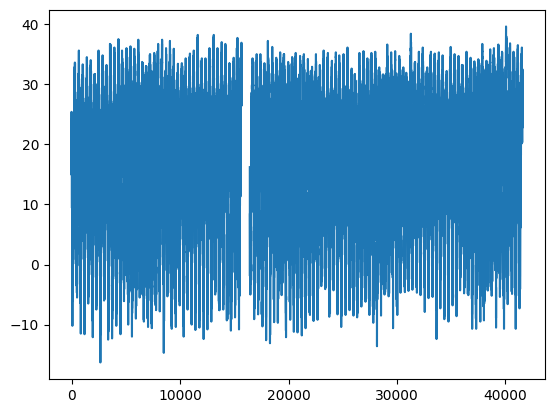

In [157]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/ta_20220920102220_UTF-8.csv')
df.rename(columns={
    df.columns[2]: '평균기온',
    df.columns[3]: '최저기온',
    df.columns[4]: '최고기온'
},inplace=True)

plt.plot(df['최고기온'])
plt.show()

> * 최고 기온 데이터 전체를 그래프로 나타냈는데, 결측치 존재 말고는 특별한 정보를 얻을 수 없습니다. 
> * 다른 관점으로 데이터를 바라보기 위해서
> * 다른 종류의 시각화를 시도해 봅시다. 

## hist:기온 데이터를 히스토그램으로 표현하기

* 특정구간의 자료의 수를 표현할때

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/ta_20220920102220_UTF-8.csv')
df.rename(columns={
    df.columns[2]: '평균기온',
    df.columns[3]: '최저기온',
    df.columns[4]: '최고기온'
},inplace=True)



(array([  35.,  596., 2812., 5465., 5275., 4915., 6248., 9004., 5915.,
         538.]),
 array([-16.3 , -10.71,  -5.12,   0.47,   6.06,  11.65,  17.24,  22.83,
         28.42,  34.01,  39.6 ]),
 <BarContainer object of 10 artists>)

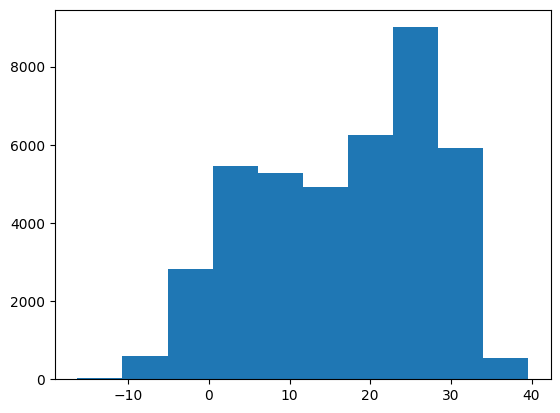

In [159]:
plt.hist(df['최고기온']) #histogram = hist() 컬럼 한개 지정

<AxesSubplot: >

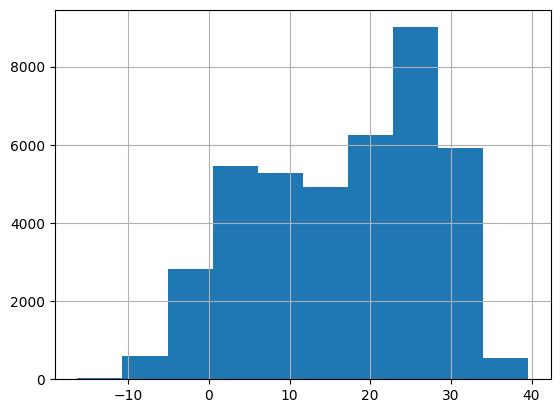

In [160]:
# pandas 내부의 matplotlib 라이브러리와 연동

df['최고기온'].hist()

<AxesSubplot: >

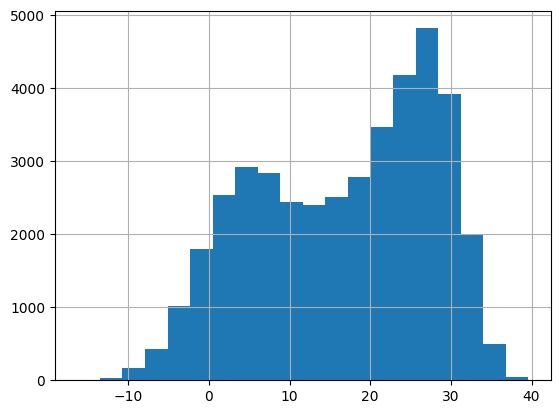

In [161]:
df['최고기온'].hist(bins=20)

> * 뭔가 낙타등처럼보인다
> * 겨울과 여름 계정 패턴이 이렇게 나타난것인가?
> * 한계정만 까로 추출해보자

## hist:겨울과 여름 계절의 패턴인가? 그럼 8월만 데이터를 뽑아보자.
* 역대 8월의 최고 온도는?
* 최고 기온의 분포(최저 ~ 최고)는?

In [162]:
# hist(데이터,몇개구간,색깔)
df.head()


,날짜,지점,평균기온,최저기온,최고기온
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [163]:
#결측치 삭제
df.dropna(inplace=True)

In [165]:
#날짜타입으로 변환
df['날짜']=df['날짜'].astype('datetime64')
df['월']=df['날짜'].dt.month

In [167]:
#8월만 추출
month_eight=df[df['월']==8]
month_eight


,날짜,지점,평균기온,최저기온,최고기온,월
305,1908-08-01,108,26.2,24.4,29.6,8
306,1908-08-02,108,26.4,23.3,30.7,8
307,1908-08-03,108,26.9,24.2,32.0,8
308,1908-08-04,108,26.3,22.6,31.5,8
309,1908-08-05,108,27.3,23.6,32.4,8
...,...,...,...,...,...,...
41538,2022-08-27,108,21.5,17.6,25.5,8
41539,2022-08-28,108,22.6,16.1,28.4,8
41540,2022-08-29,108,21.0,19.5,22.5,8
41541,2022-08-30,108,19.1,17.9,20.3,8


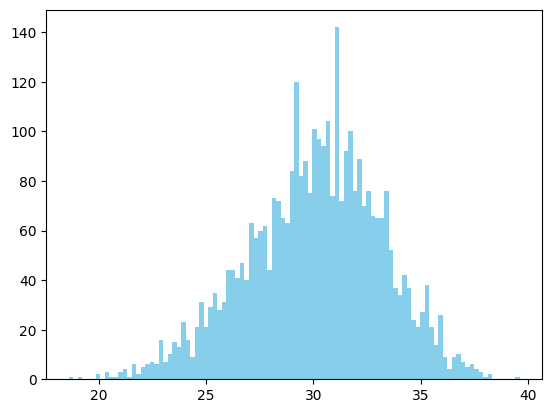

In [170]:
plt.hist(month_eight['최고기온'],bins=100,color='skyblue')
plt.show()

## hist:1월과 8월의 데이터를 히스토그램으로 시각화하기


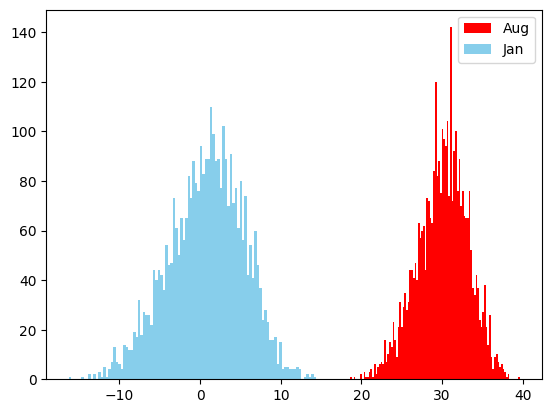

In [172]:

# 8월 데이터만 추출
month_eight=df[df['월']==8]
plt.hist(month_eight['최고기온'],bins=100,color='red',label='Aug')
# 1월 데이터만 추출
month_one=df[df['월']==1]
plt.hist(month_one['최고기온'],bins=100,color='skyblue',label='Jan')
plt.legend()
plt.show()

> * 같은데이터라도 추출하면 다른데이터값을 얻을수 있다.
> * 용도에 맞게 추출해서 확인해보자

> * 같은 데이터에서 어떤 내용을 추출하여, 어떤 방법으로 시각화하는냐에 따라 새로운 정보를 발견할 수 있습니다. 
> * 1,8월 이외에 궁금한 달이 있다면 도전!

## box:기온 데이터 대략적인 통계정보 확인하기

In [174]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/ta_20220920102220_UTF-8.csv')
df.rename(columns={
    df.columns[2]: '평균기온',
    df.columns[3]: '최저기온',
    df.columns[4]: '최고기온'
},inplace=True)


# 결측 데이터 삭제
df.dropna(inplace=True)


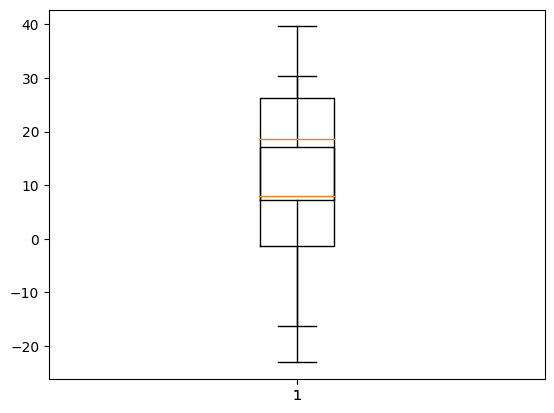

In [190]:
plt.boxplot(df['최고기온'])
plt.boxplot(df['최저기온'])
plt.show()

#뭔가 분포도에 따라 박스(75%~25%)가 왔다갔다 하는 느낌 

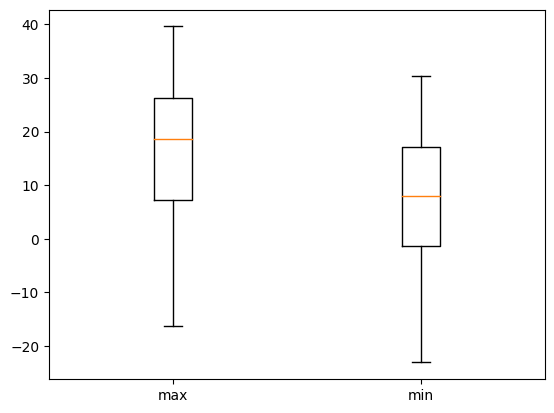

In [193]:
plt.boxplot([df['최고기온'],df['최저기온']],labels=['max','min'])
plt.show()

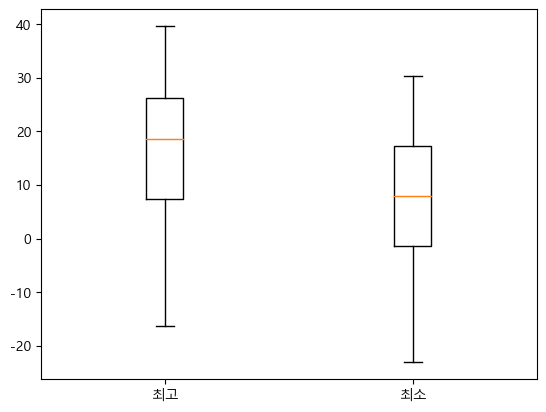

In [196]:
# 내 생일 데이터 그래프 그리기
# 한글 사용시 설정
plt.rc('font',family='Malgun Gothic')      #맑은 고딕을 기본 글꼴로 설정, macOS일 경우,'AppleGothic'
# plt.rc('font', family='AppleGothic') #맥
plt.rcParams['axes.unicode_minus']=False  #마이너스 기호 깨짐 방지
plt.boxplot([df['최고기온'],df['최저기온']],labels=['최고','최소'])
plt.show()

## 월별 기온 데이터

1. 데이터를 월별로 조회하고, 결과를 리스트에 담는다.
2. 월별 데이터를 box plot으로 그래프 그린다. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/ta_20220920102220_UTF-8.csv')
df.rename(columns={
    df.columns[2]: '평균기온',
    df.columns[3]: '최저기온',
    df.columns[4]: '최고기온'
},inplace=True)

# 결측 데이터 삭제
df.dropna(inplace=True)
# 날짜 데이터 Str => date 형으로 변환
df['날짜'] = df['날짜'].astype('datetime64')

In [13]:

df['월']=df['날짜'].dt.month
a=df[df['월']==10]['평균기온']
a

0        13.5
1        16.2
2        16.2
3        16.5
4        17.6
         ... 
41234    13.4
41235    12.7
41236    14.6
41237    13.8
41238    14.1
Name: 평균기온, Length: 3439, dtype: float64

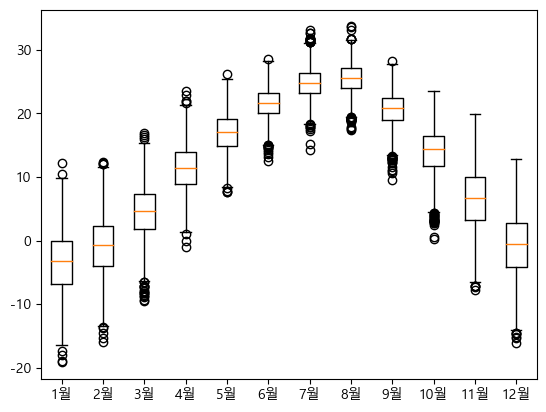

In [14]:
#1월부터 12월까지 전부 박스 플롯으로 나타내보자

plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False


month_avg_temp=[]
labelling=[]
for n in range(1,13):
    month_avg_temp.append(df[df['월']==n]['평균기온'])
    labelling.append(f'{n}월')
plt.boxplot(month_avg_temp,labels=labelling)
plt.show()


github: 프로젝트 + ~~~
